In [3]:
%matplotlib inline

In [4]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\XXXXX\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share' 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap 

import matplotlib
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

from networkx.algorithms import community


import networkx as nx

In [5]:
earthquake_data = pd.read_csv("data/earthquakes.csv")
earthquake_data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [13]:
dt_info = earthquake_data.Date + " " + earthquake_data.Time
earthquake_data = earthquake_data.drop(index = dt_info[dt_info.str.len() > 20].index)                 #DAFUQ
earthquake_data["DateTime"] = pd.to_datetime(earthquake_data.Date + " " + earthquake_data.Time)

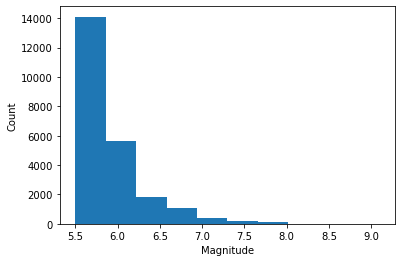

In [14]:
plt.hist(earthquake_data.Magnitude)

plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

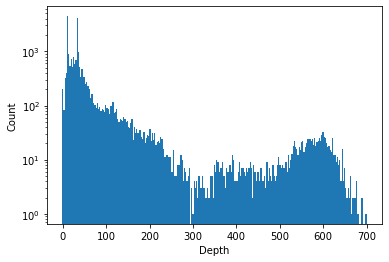

In [15]:
plt.hist(earthquake_data.Depth, bins="fd")

plt.yscale("log")
plt.xlabel("Depth")
plt.ylabel("Count")
plt.show()

In [16]:
earthquake_coordinates = m(earthquake_data.Longitude.tolist(), earthquake_data.Latitude.tolist())

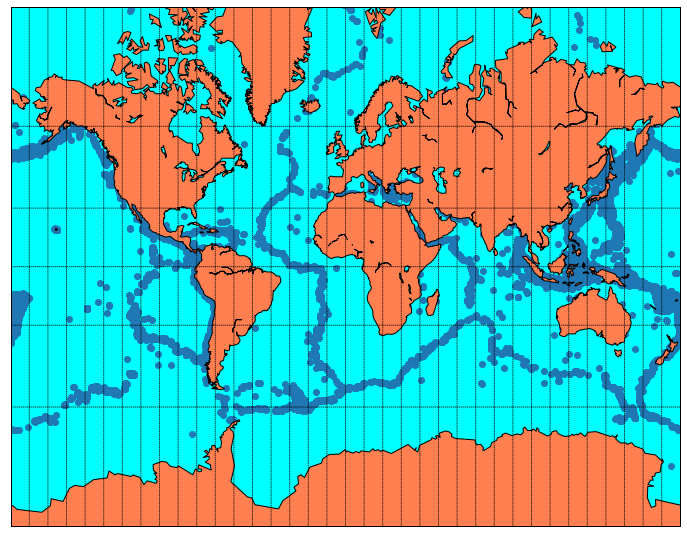

In [26]:
plt.figure(figsize=(12,15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 10))
m.drawmapboundary(fill_color = "aqua")\

#plt.scatter([10000000], [100000000], s = 10000, c="blue")
plt.scatter(*earthquake_coordinates)

plt.show()

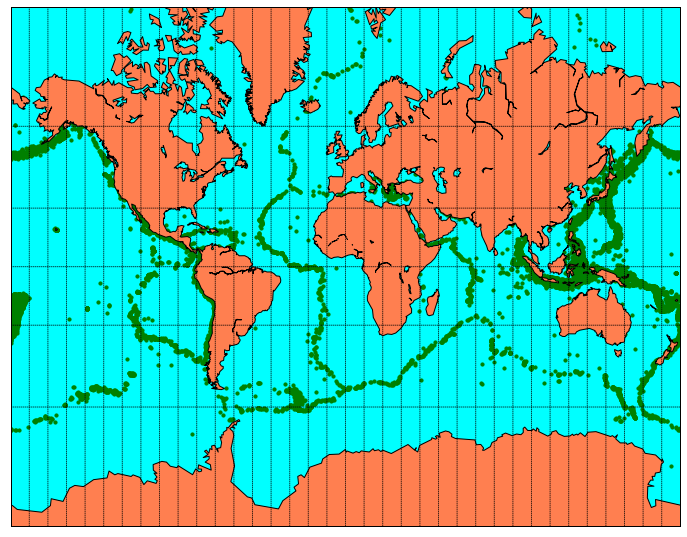

In [20]:
plt.figure(figsize=(12,15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawparallels(np.arange(-90, 91, 30))
m.drawmeridians(np.arange(-180, 181, 10))
m.drawmapboundary(fill_color = "aqua")

plt.scatter(earthquake_coordinates[0], earthquake_coordinates[1], c="g", s=10)

plt.show()

In [21]:
volcano_data = pd.read_csv("data/volcanos.csv")
volcano_data

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [62]:
volcano_coordinates = m(volcano_data.Longitude.tolist(), volcano_data.Latitude.tolist())

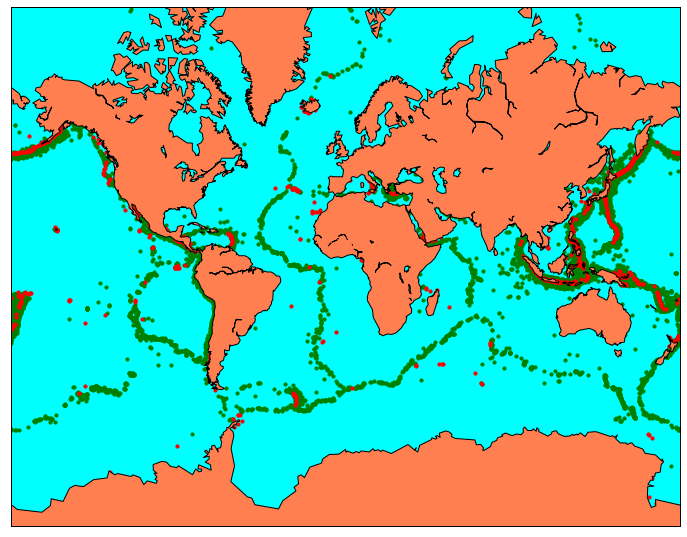

In [64]:
plt.figure(figsize=(12,15))
m = Basemap(projection = "merc", llcrnrlat = -80, urcrnrlat = 80,
  llcrnrlon = -180, urcrnrlon = 180)
m.drawcoastlines()
m.fillcontinents(color = "coral", lake_color = "aqua")
m.drawmapboundary(fill_color = "aqua")

plt.scatter(earthquake_coordinates[0], earthquake_coordinates[1], c="g", s=10)
plt.scatter(volcano_coordinates[0], volcano_coordinates[1], c="r", s=10)

plt.show()

In [70]:
ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv", low_memory=False)
ufos

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556


In [77]:
ufos = ufos[["datetime", "country", "state", "latitude", "longitude"]]
ufos = ufos[ufos.country == "us"]
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,tn,36.1658333,-86.784444
80328,9/9/2013 22:00,us,id,43.6136111,-116.202500
80329,9/9/2013 22:00,us,ca,38.2972222,-122.284444
80330,9/9/2013 22:20,us,va,38.9011111,-77.265556


In [83]:
state_names = pd.read_csv("data/states.csv")

In [84]:
state_names.abbreviation = state_names.abbreviation.str.lower()
state_names_dict = {state.abbreviation: state["name"] for index, state in state_names.iterrows()}
ufos.state.replace(state_names_dict, inplace = True)

In [85]:
ufos.groupby("state").size()

state
Alabama                  642
Alaska                   319
Arizona                 2414
Arkansas                 588
California              8912
Colorado                1413
Connecticut              892
Delaware                 166
District of Columbia       7
Florida                 3835
Georgia                 1255
Hawaii                   262
Idaho                    521
Illinois                2499
Indiana                 1288
Iowa                     678
Kansas                   613
Kentucky                 855
Louisiana                558
Maine                    558
Maryland                 837
Massachusetts           1256
Michigan                1836
Minnesota               1012
Mississippi              375
Missouri                1458
Montana                  478
Nebraska                 381
Nevada                   803
New Hampshire            486
New Jersey              1255
New Mexico               720
New York                2980
North Carolina          1740
North Da

In [97]:
state_names

,abbreviation,name
0,ak,Alaska
1,al,Alabama
2,ar,Arkansas
3,as,American Samoa
4,az,Arizona
5,ca,California
6,co,Colorado
7,ct,Connecticut
8,dc,District of Columbia
9,de,Delaware


In [89]:
m = Basemap(projection = "merc", llcrnrlon=-130, llcrnrlat=23, urcrnrlon = -64, urcrnrlat=50) 

(273,
 5,
 [-179.14734, 17.884813, 0.0, 0.0],
 [179.77847, 71.35256064399981, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x1c7fa237e80>)

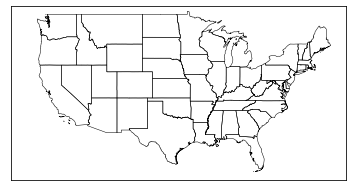

In [91]:
m.readshapefile("data/st99_d00", name="states", drawbounds=True)

In [101]:
m.states_info

[{'AREA': 271.254383622068,
  'PERIMETER': 227.171421517178,
  'ST99_D00_': 2,
  'ST99_D00_I': 1,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 1},
 {'AREA': 0.00374851298849799,
  'PERIMETER': 0.349840468459525,
  'ST99_D00_': 3,
  'ST99_D00_I': 2,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 2},
 {'AREA': 0.00149949982799957,
  'PERIMETER': 0.153532820266569,
  'ST99_D00_': 4,
  'ST99_D00_I': 3,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 3},
 {'AREA': 0.0313000839335011,
  'PERIMETER': 0.71222623089465,
  'ST99_D00_': 5,
  'ST99_D00_I': 4,
  'STATE': '02',
  'NAME': 'Alaska',
  'LSAD': '01',
  'REGION': '4',
  'DIVISION': '9',
  'LSAD_TRANS': '',
  'RINGNUM': 1,
  'SHAPENUM': 4},
 {'AREA': 0.88933881264201

In [106]:
num_sightings_by_state = ufos.groupby("state").size()

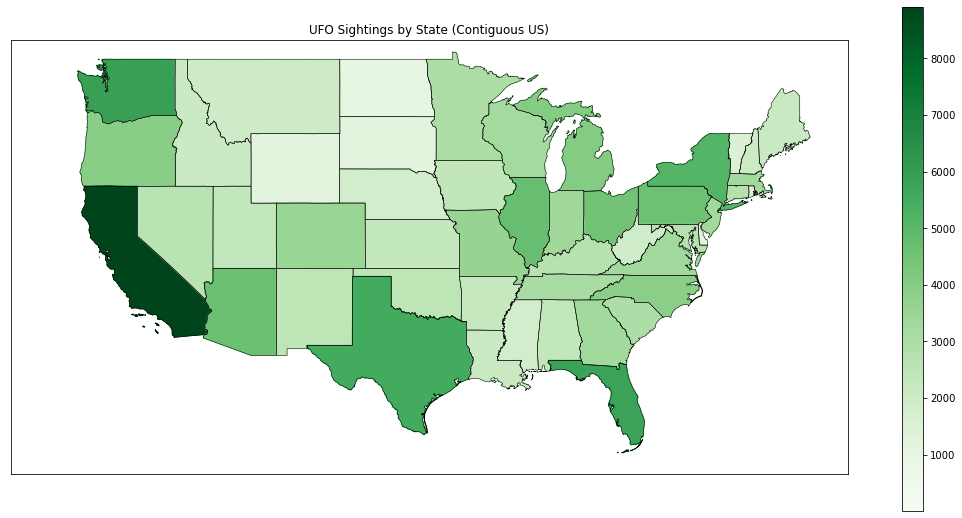

In [189]:
fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("data/st99_d00", "states", drawbounds = True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()

for shape_dict in m.states_info:
  state_name = shape_dict["NAME"]
  # Skip DC and Puerto Rico
  if state_name not in ["District of Columbia", "Puerto Rico"]:
    sightings = num_sightings_by_state[num_sightings_by_state.index == state_name][0]
    colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
  state_names.append(state_name)
ax = plt.gca()

for nshape, seg in enumerate(m.states):
  # Skip DC and Puerto Rico
  if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
    color = rgb2hex(colors[state_names[nshape]])
    poly = Polygon(seg, facecolor = color, edgecolor = color)
    ax.add_patch(poly)
plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap, norm = matplotlib.colors.Normalize(vmin, vmax))
plt.show()

In [140]:
g = nx.Graph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

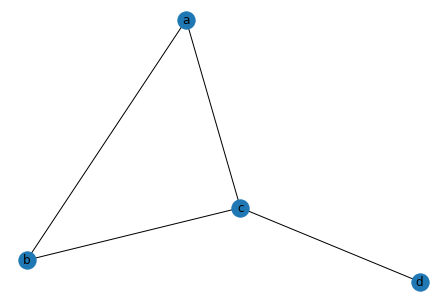

In [141]:
nx.draw(g, with_labels = True)
plt.show()

In [142]:
g.nodes

NodeView(('a', 'b', 'c', 'd'))

In [143]:
g.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [144]:
nx.shortest_path(g, "a", "d")

['a', 'c', 'd']

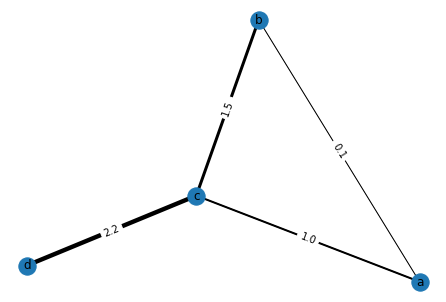

In [145]:
pos = nx.spring_layout(g)
weights = nx.get_edge_attributes(g, "weight")
nx.draw(g, pos, with_labels = True)
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw_networkx_edges(g, pos, width = [v * 2 for v in weights.values()])
plt.show()

In [146]:
pos

{'a': array([ 0.97840592, -0.51910786]),
 'b': array([0.16795238, 0.97410354]),
 'c': array([-0.1463583 , -0.02821674]),
 'd': array([-1.        , -0.42677894])}

In [147]:
nx.shortest_path(g, "b", "d", weight="weight")

['b', 'a', 'c', 'd']

In [148]:
nx.shortest_path_length(g, "b", "d", weight="weight")

3.3000000000000003

In [152]:
g = nx.DiGraph()
g.add_edge("a", "b", weight = 0.1)
g.add_edge("b", "c", weight = 1.5)
g.add_edge("a", "c", weight = 1.0)
g.add_edge("c", "d", weight = 2.2)

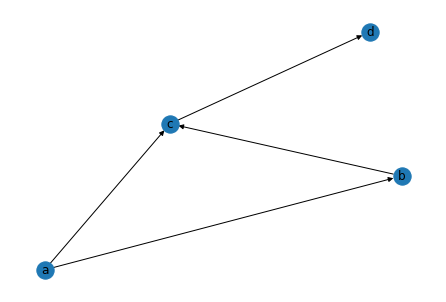

In [153]:
nx.draw(g,with_labels=True)
plt.show()

In [157]:
nx.shortest_path(g, "b", "d")

['b', 'c', 'd']

In [156]:
facebook_graph = nx.read_edgelist("data/facebook_combined.txt")

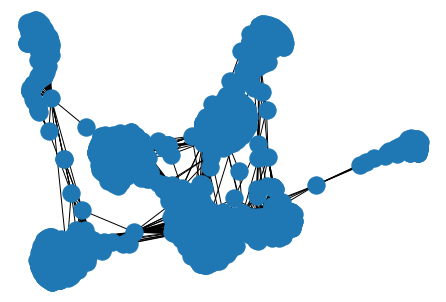

In [168]:
fb = nx.Graph(facebook_graph)
nx.draw(fb)
plt.show()

In [160]:
len(facebook_graph.nodes), len(facebook_graph.edges)

(4039, 88234)

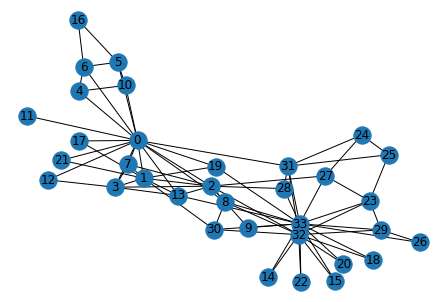

In [163]:
karate_graph = nx.karate_club_graph()
nx.draw(karate_graph, with_labels=True)

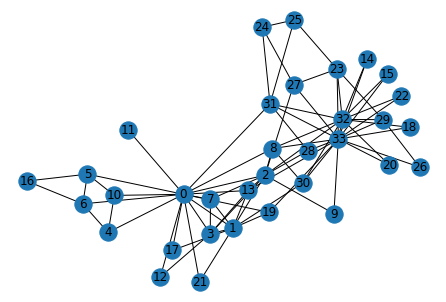

In [164]:
nx.draw_spring(karate_graph, with_labels=True)

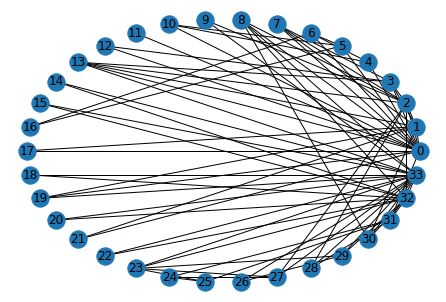

In [165]:
nx.draw_circular(karate_graph, with_labels=True)

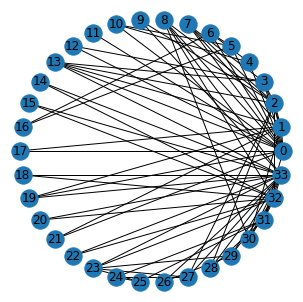

In [166]:
"""
For equal circle
"""
nx.draw_circular(karate_graph, with_labels=True)
plt.gca().set_aspect("equal")
plt.show()

In [174]:
#[nx.shortest_path(karate_graph, 17, other) for other in list(karate_graph.nodes)]

centrality = nx.betweenness_centrality(karate_graph)
centrality

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [173]:
list(karate_graph.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [183]:
communities_generator = community.girvan_newman(karate_graph)
for i in range(1, 30):
      communities = next(communities_generator)
      print("level " + str(i), communities)


level 1 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
level 2 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
level 3 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
level 4 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
level 5 ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
level 6 ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
level 7 ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11

In [180]:
g = nx.Graph()

<generator object girvan_newman at 0x000001C7916A1820>